# MLBD / Introduction to Machine Learning modeling using IPython notebooks

In this laboratory you are going to learn how to perform interactive computing using **ipython**. **ipython** is an interactive shell for python that has more functionnalities than the basic one. This guide does not start from the basics of the general purpose language **python**. If you do not know this language, it is recommended to follow a **python** tutorial in order to learn the basic concepts and commands. You can have a look at the [official python tutorial](https://docs.python.org/2/tutorial/) or [Google's python tutorial](https://developers.google.com/edu/python/) for example.

Note that for this course, we will use the Python 2.7.X series.

You will use a browser-based notebook to interactively explore a dataset by:
- Reading raw data from ascii files
- Reading typed data (data frames) from ascii files
- Selecting specific columns and/or rows from a dataset
- Filtering datasets
- Plotting the information in the dataset (e.g., scatter-plot, boxplot, histogram)

## 1. Using the notebooks

You are in an ipython notebook right now. An ipython notebook is a web interface to a python interpreter.

A notebook is made of cells. Each cell has a type which defines what happen when it is run. 

- Markdown cells allow you to write [Markdown](http://daringfireball.net/projects/markdown/) text in them. They are just displayed as HTML when run.
- Code cells contain python code. When the cell is run, the code is sent to the python interpreter, executed and you get the result in the cell output.
- Various header cells that allow you to structure your document.

You can change the type of a cell using the drop-down menu in the toolbar.

You can click (for Code cells) or double-click (for headers and markdown cells) on cells to edit their content. You can then use keyboard shortcuts to run them :

- Ctrl + Enter : run in place
- Shift + Enter : run and move to next cell
- Alt + Enter : run and insert new cell after

In [55]:
# This is a code cell containing python code !
print 2+2

4


The python interpreter that executes the code you write in the notebook is called a *Kernel*. You can restart the kernel (the interpreter) using the *Kernel* menu. This is useful if you want to delete all your variables.

Ipython has also "magic" functions that start with % . They allow you to do a lot of useful things with your ipython environment :

http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb

The %who magic gives you a list of the defined python variables. object? can be used to get documentation about an object :

In [56]:
a = 2
%who

X	 X_class	 a	 alcohol_by_class	 array1	 array2	 array2_t1	 c	 class_colors	 
class_mask	 classes	 col	 col1	 colname	 colnames	 cross_validation	 data	 df	 
distances	 euclidean_distance	 i	 idx	 idx1	 mask	 my_documented_function	 nn_classify	 nn_classify_K	 
nn_classify_single	 norm	 pd	 pl	 scatter_matrix	 test	 train	 y	 y_test_pred	 



In [58]:
def my_documented_function(a):
    """This is a revolutionary function that returns a + 1"""
    return a + 1

print my_documented_function(2)
print 'This is the traditional python help() function :\n'
help(my_documented_function)

# We can access the same info with just ? (note that you have to run this cell to view the effect)
my_documented_function?

3
This is the traditional python help() function :

Help on function my_documented_function in module __main__:

my_documented_function(a)
    This is a revolutionary function that returns a + 1



## 2. Scientific computing with Python

Python has a number of packages (libraries) dedicated to scientific programming :

The foundation is [numpy](http://www.numpy.org/) which provides a N-dimensional array implementation with a nice indexing syntax (similar to MATLAB).

Then comes [scipy](http://www.scipy.org/) which contains a number of algorithms (signal processing, distance computation, etc...) built on top of numpy.

[matplotlib](http://matplotlib.org/) is a library to create 2D plots.

[pandas](http://pandas.pydata.org/) provides a DataFrame implementation, which is a layer on top of numpy arrays that makes some things (handling missing values, date indexing) easier. Heavily inspired by the [R](http://www.r-project.org/) statistical computing language.

[scikit-learn](http://scikit-learn.org/stable/) is a machine learning library that contains implementations of many of the most popular machine learning algorithms.

[theano](http://deeplearning.net/software/theano/) and [tensorflow](http://www.tensorflow.org) allows you to write programs that are compiled and run on a GPU.

Finally, this is not a python package, but [stack overflow](http://stackoverflow.com/) is a really good question and answers where you can probably find answers to the most common problems you'll have :-)

If you want to install a scientific python environment on your machines, we strongly suggest to use [anaconda](https://store.continuum.io/cshop/anaconda/). It is a "python distribution" that comes with a package manager (conda) and all of the scientific packages listed above (and many others) pre-installed.


## 3. Quick numpy introduction

Numpy allows you to define [multidimensionnal arrays](http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html) (recommended reading).

In [59]:
# Makes the numpy function available as np.<funcname> (np is a convention)
import numpy as np

array1 = np.array([
    [1, 2, 3],
    [4, 5, 6]]
)

print array1.shape

# The last line of a python cell is evaluated and used as the output for the cell
array1

(2, 3)


array([[1, 2, 3],
       [4, 5, 6]])

The array elements can be accessed using the [indexing syntax](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#arrays-indexing) (recommended reading). Numpy (and python) uses 0-based indexing.

In [60]:
print "element (2,3) : ", array1[1,2]
print "first row     : ", array1[0,:]
print "second column : ", array1[:,1]
print "second and third element of the second row : ", array1[1, 1:]

element (2,3) :  6
first row     :  [1 2 3]
second column :  [2 5]
second and third element of the second row :  [5 6]


You can do a [lot of things](http://docs.scipy.org/doc/numpy/reference/) with numpy arrays. For example, we can compute the mean of each column :

In [61]:
array1.mean(axis=1)

array([ 2.,  5.])

We can also sort an array :

In [62]:
array2 = np.array([5, 8, 2, 9, 4, 3])
print "original      : ", array2


print "using argsort : ", array2[np.argsort(array2)] # the fancy indexing version

array2.sort() # not that this does in-place sorting, so it *modifies* array2
print "after sort()  : ", array2


original      :  [5 8 2 9 4 3]
using argsort :  [2 3 4 5 8 9]
after sort()  :  [2 3 4 5 8 9]


And we can randomly shuffle an array:

In [63]:
np.random.shuffle(array2)

print array2

print "the max value is at position:", np.argmax(array2)

[2 9 4 3 8 5]
the max value is at position: 1


We can also use comparison operators on arrays, giving us a boolean mask. And then use the mask to index the array :

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Exercises</p>

As exercises, do the following :

- Compute the max of each row of array1. Compute the max of each column.
- Print the elements of array1 that are less than 4 (without a for loop)
- Convert the values of array2 to the range [0,1]

In [64]:
mask = (array1 > 2) & (array1 < 5)
print array1
print mask
print array1[mask]

[[1 2 3]
 [4 5 6]]
[[False False  True]
 [ True False False]]
[3 4]


In [65]:
print np.amax(array1,axis=0)
print np.amax(array1,axis=1)
print array1[array1[:]<4]

[4 5 6]
[3 6]
[1 2 3]


In [66]:
print array2
array2_t1 = 1.0 * (array2 - np.min(array2)) / (np.max(array2) - np.min(array2))
print array2_t1

[2 9 4 3 8 5]
[ 0.       1.       0.28571  0.14286  0.85714  0.42857]


## 4. Loading a dataset with numpy 

### The Wine dataset

We will use the wine dataset from the UCI repository :
https://archive.ics.uci.edu/ml/datasets/Wine

The wine.data file is a simple CSV file, which we can easily load as a numpy array with np.genfromtxt.

In [67]:
# Some nicer printing defaults for numpy arrays
np.set_printoptions(precision=5, suppress=True)

# Be careful to place the database in the right directory or adapt the path
data = np.genfromtxt('data/wine/wine.data', delimiter=',')
print data.shape
print data

(178, 14)
[[    1.      14.23     1.71 ...,     1.04     3.92  1065.  ]
 [    1.      13.2      1.78 ...,     1.05     3.4   1050.  ]
 [    1.      13.16     2.36 ...,     1.03     3.17  1185.  ]
 ..., 
 [    3.      13.27     4.28 ...,     0.59     1.56   835.  ]
 [    3.      13.17     2.59 ...,     0.6      1.62   840.  ]
 [    3.      14.13     4.1  ...,     0.61     1.6    560.  ]]


So this is a dataset with 178 samples and 14 dimensions for each sample. Let's have a look at the dataset description file (cat is a nice ipython command that print the content of a text file, like the unix cat)

In [68]:
cat 'data/wine/wine.names'

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [69]:
colnames = np.array([
    'class', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols', 
    'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue',
    'OD280/OD315 of diluted wines', 'proline'
])
colnames.shape

(14,)

## 5. Quick introduction to Pandas

Ok so now we have two numpy arrays. *data* contains our data and *colnames* the name of our columns. We would like to deal with only one datastructure that can store both the data and the columns names. That's what pandas' DataFrame are for ! (or, but a bit less elegant, [numpy structured arrays](http://docs.scipy.org/doc/numpy/user/basics.rec.html)).

Note that we could also directly load our CSV using pandas.read_csv)

In [70]:
import pandas as pd # pd is a convention too
df = pd.DataFrame(data=data[:,1:], columns=colnames[1:])
# Ensure the class column is an int
df['class'] = data[:,0].astype(np.int)

# Pandas dataframes have a nice pretty-printing for ipython notebooks
df

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,1
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,1
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,1
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,1
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,1
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,1


DataFrames have a nice <b>describe()</b> function that print some per-column statistics

In [71]:
print df.describe()

          alcohol  malic acid         ash  alcalinity of ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total phenols  flavanoids  nonflavanoid phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Exercise</p>

Describe in statistical terms the alcohol variable for each class of wine ? e.g., use the describe() function of dataframes for each class of wine.

In [72]:
print df["class"].unique()
for c in range (1,4):
    print 'classe',c
    print df[df["class"]==c]["alcohol"].describe()

[1 2 3]
classe 1
count    59.000000
mean     13.744746
std       0.462125
min      12.850000
25%      13.400000
50%      13.750000
75%      14.100000
max      14.830000
Name: alcohol, dtype: float64
classe 2
count    71.000000
mean     12.278732
std       0.537964
min      11.030000
25%      11.915000
50%      12.290000
75%      12.515000
max      13.860000
Name: alcohol, dtype: float64
classe 3
count    48.000000
mean     13.153750
std       0.530241
min      12.200000
25%      12.805000
50%      13.165000
75%      13.505000
max      14.340000
Name: alcohol, dtype: float64


## 6. Visual exploratory analysis of data 

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. Box and whisker plots use a graphical box: the bottom and top of the box are always the first (Q1) and third (Q3) quartiles, and the band inside the box is always the second quartile (the median). The whiskers are placed at Q1 - 1.5 IQR and Q3 + 1.5 IQR, where IQR means Inter-quartile range.
See [Boxplot definition at Wikipedia](https://en.wikipedia.org/wiki/Box_plot)



### Boxplots with matplotlib

In [73]:
import pylab as pl # pylab is matplotlib
# The line below enables matplotlib-ipython integration and allows plots to be displayed inline in the
# notebook. The --no-import-all is to avoid polluting our namespace with a import *
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


We want to see what the distribution of each feature is for each class. We'll use the [boxplot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot) function of pylab/pyplot.

classes :  [1 2 3]


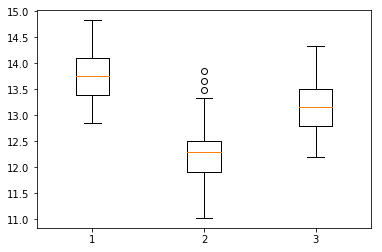

In [74]:
classes = np.unique(df['class'])
print 'classes : ', classes

#alcohol_by_class = [df['alcohol'][df['class'] == c] for c in classes]
alcohol_by_class = []
for c in classes:
    class_mask = df['class'] == c
    alcohol_by_class.append(df['alcohol'][class_mask])
_ = pl.boxplot(alcohol_by_class)

dataframes have a [boxplot](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.boxplot.html) function that does per-class plotting with the *by* parameter :

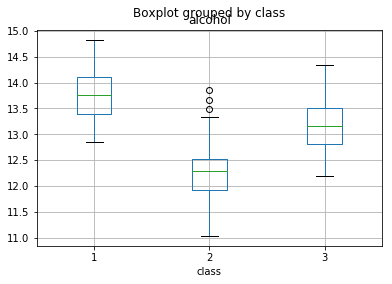

In [75]:
_ = df.boxplot(by="class", column='alcohol')

We can do that for each column

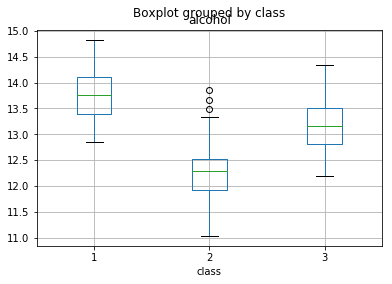

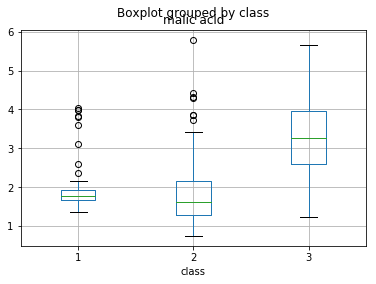

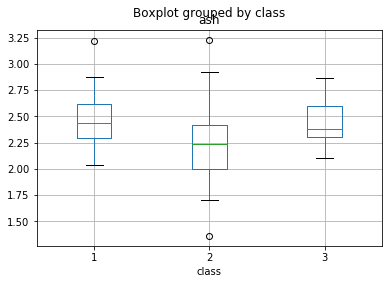

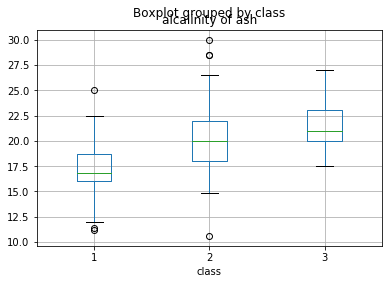

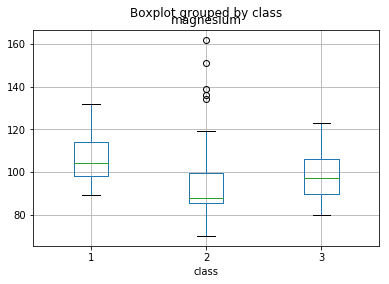

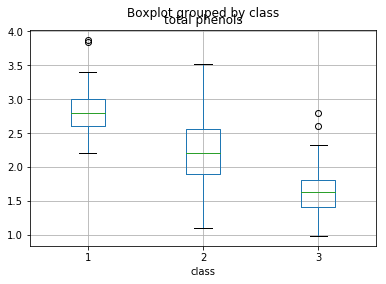

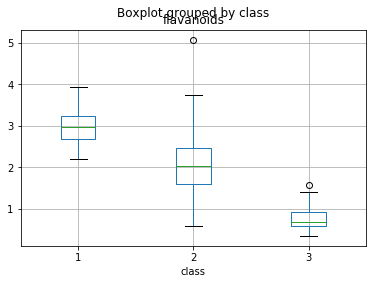

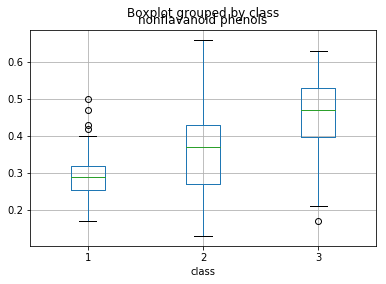

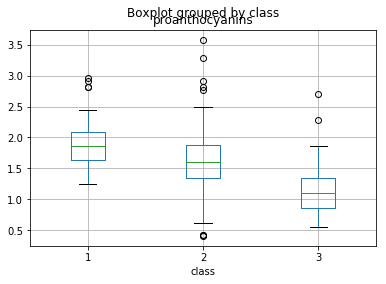

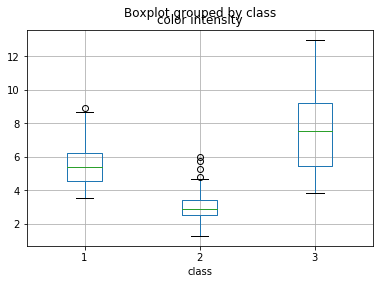

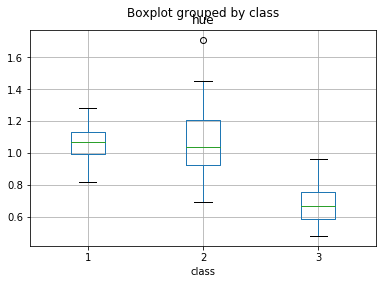

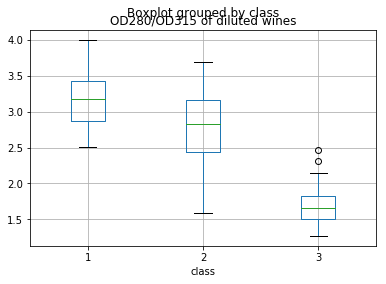

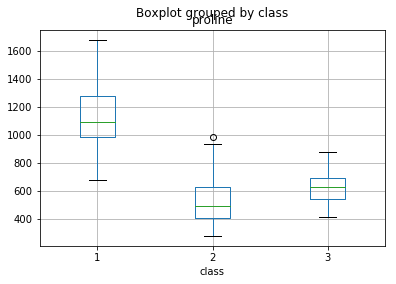

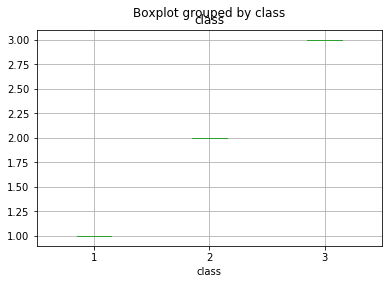

In [76]:
for c in df.columns:
    _ = df.boxplot(by='class', column=c)

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: By looking at the boxplots, which features seems the most discriminative ?</p>

Les boxplots montrent que la feature "flavanoids" est la plus discriminative.

#### Scatter plot visualization

In [77]:
# only the data
#X_2d = df.drop("class", axis=1).as_matrix()
X = df[['magnesium', 'total phenols']].as_matrix()
y = df['class'].as_matrix()
print "X shape : ", X.shape
print "y shape : ", y.shape

X shape :  (178, 2)
y shape :  (178,)


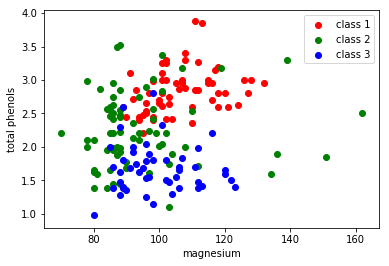

In [78]:
class_colors = {1:'r', 2:'g', 3:'b'}
for c in [1, 2, 3]:
    X_class = X[y == c]
    pl.scatter(X_class[:,0], X_class[:,1], color=class_colors[c], label='class ' + str(c))
pl.legend()
pl.xlabel('magnesium')
pl.ylabel('total phenols')

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Exercise: Try other pairs of variables </p>

Index([u'alcohol', u'malic acid', u'ash', u'alcalinity of ash', u'magnesium',
       u'total phenols', u'flavanoids', u'nonflavanoid phenols',
       u'proanthocyanins', u'color intensity', u'hue',
       u'OD280/OD315 of diluted wines', u'proline', u'class'],
      dtype='object')


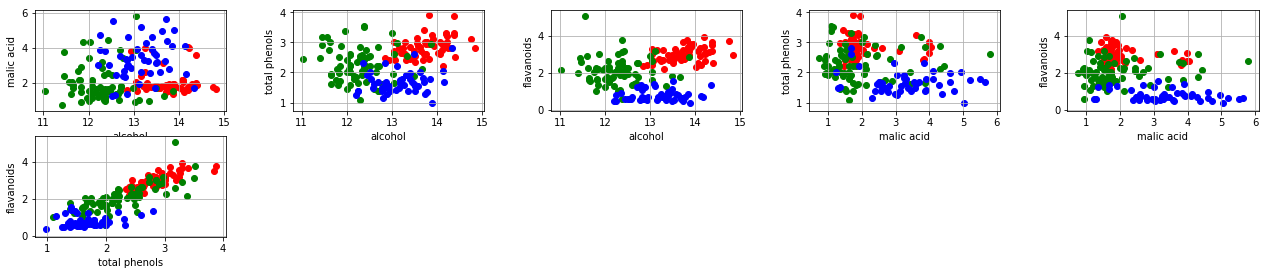

In [47]:
class_colors = {1:'r', 2:'g', 3:'b'}
plt.figure(figsize=(20,10))
i=551
print df.columns
#colname=df.columns
colname=["alcohol","malic acid","total phenols","flavanoids"]
for idx, col in enumerate(colname):
    if col <> "class":
        for idx1, col1 in enumerate(colname):
            if idx1<idx:
                continue
            if col1 <> "class" and col <> col1:
                X = df[[col, col1]].as_matrix()
                y = df['class'].as_matrix()
                for c in [1, 2, 3]:
                    X_class = X[y == c]
                    plt.subplot(i)
                    pl.scatter(X_class[:,0], X_class[:,1], color=class_colors[c], label='class ' + str(c))
                pl.xlabel(col)
                pl.ylabel(col1)
                plt.grid(True)
                i=i+1
                
                plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)

                    

#### Scatter matrix visualization

It generates a matrix of scatter plots for each pair of variables. The diagonal displays a density plot of the variable itself.

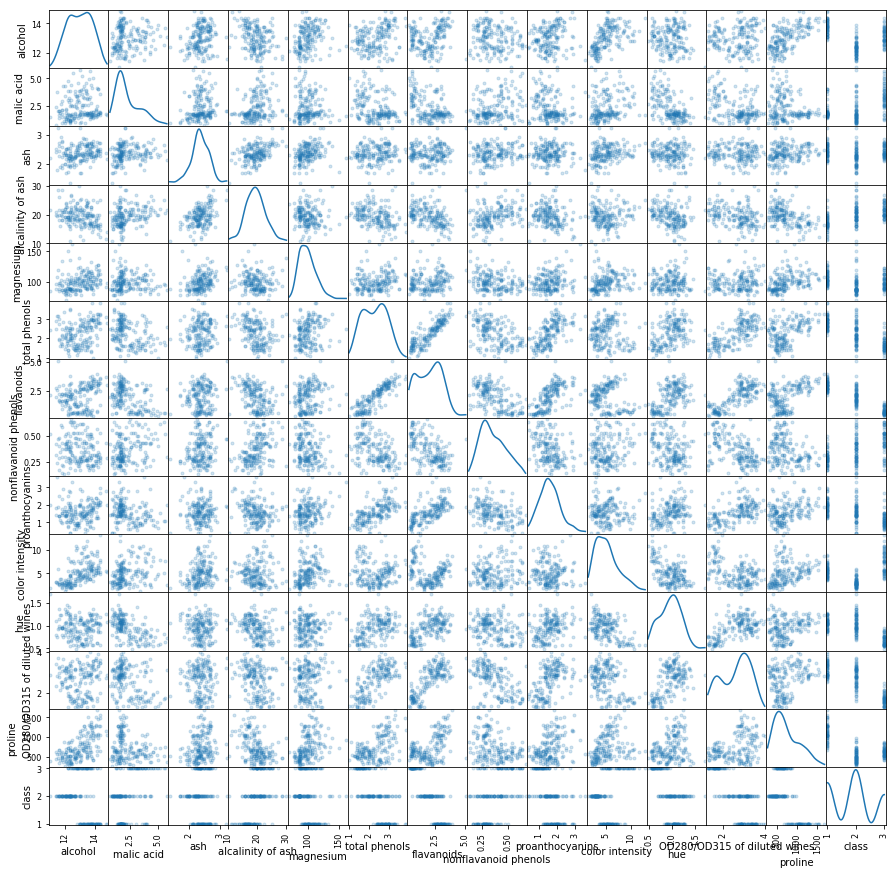

In [48]:
from pandas.tools.plotting import scatter_matrix

_ = scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde')

## 7. Preparing the data for modeling 

#### Standardization

As you can see from the df.describe() above, the range values for each column in our dataset varies a lot. Depending on the model you want to use, that can be a big problem.

The first model we'll use here is k-Nearest Neighbor with the euclidean distance. When using the euclidean distance, it is important to think about how to preprocess your data.

For example, look at the 'alcohol' and 'total phenols' columns. The stddev for magnesium is 14 while for total phenols it is 0.62. This means that the data are more spread out on the magnesium axis compare to the phenols axis. And if we use raw values to compute distances, the magnesium axis will be much more important than the phenols axis, but this importance will just be due to the (arbitrary) scales that we used to measure magnesium and phenols.

In [49]:
print df['magnesium'].describe()
print df['total phenols'].describe()

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64
count    178.000000
mean       2.295112
std        0.625851
min        0.980000
25%        1.742500
50%        2.355000
75%        2.800000
max        3.880000
Name: total phenols, dtype: float64


To make the distances less dependent on particular scales, we can standardize our data by making sure each column has 0 mean and unit variance, using [sklearn.preprocessing.scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) or by computing the normalization ourselves.

#### Preparing the data sets for crossvalidation: Train/test split

To build and evaluate a machine learning model, we need to split our data into training and testing sets. Scikit learn has a [cross_validation](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) module that helps with this task.

In [50]:
from sklearn import cross_validation
X = df[['magnesium', 'total phenols']].as_matrix()
y = df['class'].as_matrix()
# train and test are indices arrays containing the indices of train/test samples
train, test = cross_validation.train_test_split(
    np.arange(X.shape[0]), test_size=0.4, random_state=42 # we fix random state for reproducibility)
)

print "train shape : ", train.shape
print "test shape  : ", test.shape

train shape :  (106,)
test shape  :  (72,)


/home/mlbd/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [51]:
print train

[ 75  10 147 123   0 142 126  64  44  96  28  40 127  25  23 132  81  79
  84  39 101  86 120 173 162  47  94 135 166  61  73  33 125 133 139  62
 176 112 115 105  53   5 160   3 165  49  35  80  77  34  46   7 124  43
  70 136 110  91  83 156 161  89   8  13  59 152 131  17  72 155 134 148
 163  63  54 107  50 175  58  48  88  21  57 172 129  37 157 168   1  52
 149 130 151 103  99 116  87  74 121 177  20  71 106  14  92 102]


## 8. Classifying the wine data

We will use a k-Nearest Neighbor classifier. This classifier will classify a new sample by assigning it the class of its nearest neighbor (for k=1). It computes the distance between the new sample and all the samples in the training set, find the nearest training sample and then use the class of the nearest neighbor to classify the new sample.

The [scipy.spatial.distance](http://docs.scipy.org/doc/scipy/reference/spatial.distance.html) module helps with distance computation

To make the distances less dependent on particular scales, we can standardize our data by making sure each column has 0 mean and unit variance, using [sklearn.preprocessing.scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) .

In [54]:
def norm(x):
    return np.sqrt(x.dot(x))

def euclidean_distance(x1, x2):
    """Euclidean distance"""
    return norm(x1 - x2)

def distances(X_train, x):
    """
    Returns a vector containing the distance between x and each
    sample in X_train
    """
    n_train = X_train.shape[0]
    return np.array([euclidean_distance(X_train[i,:], x) for i in range(n_train)])

def nn_classify_single(X_train, y_train, X):
    """
    Nearest neighbor classifier. Returns the class of the nearest training vector
    """
    dists = distances(X_train, X)
    closest = np.argmin(dists)
    return y_train[closest]

def nn_classify(X_train, y_train, X):
    """
    Assign to each row in X the class of its nearest neighbor in X_train
    """
    y_pred = np.zeros(X.shape[0], dtype=np.int)
    for i in xrange(X.shape[0]):
        y_pred[i] = nn_classify_single(X_train, y_train, X[i])
    return y_pred

y_test_pred = nn_classify(X[train], y[train], X[test])
print "y_true : ", y[test]
print "y_pred : ", y_test_pred

y_true :  [1 1 3 1 2 1 2 3 2 3 1 3 1 2 1 2 2 2 1 2 1 2 2 3 3 3 2 2 2 1 1 2 3 1 1 1 3
 3 2 3 1 2 2 2 3 1 2 2 3 1 2 1 1 3 3 2 2 1 2 1 3 2 2 3 1 1 1 3 1 1 2 3]
y_pred :  [3 1 3 1 2 1 2 1 2 3 2 3 2 2 1 3 3 2 2 2 1 2 3 2 2 2 1 1 2 3 2 3 1 1 3 2 2
 3 2 3 1 2 2 1 3 2 3 1 2 2 2 1 1 3 2 3 2 1 3 2 2 2 2 2 1 2 2 3 1 2 2 3]


## 9. Performance evaluation

We can evaluate the performance of our classifier by computing the f1 score and plotting a confusion matrix.

A <b>confusion matrix</b> is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In the confusion matrix all correct guesses are located in the diagonal of the table, so it's easy to visually inspect the table for errors, as they will be represented by values outside the diagonal.

For an example, please see the Wikipedia page: https://en.wikipedia.org/wiki/Confusion_matrix

Behind the confusion matrix, there are the following concepts:

<b>true positives (TP)</b>: These are cases in which we predicted yes (they have the disease), and they do have the disease.

<b>true negatives (TN):</b> We predicted no, and they don't have the disease.

<b>false positives (FP):</b> We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")

<b>false negatives (FN):</b> We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

<b>precision</b>: When we predict yes, how often are we correct?<p>

<font color="red">precision = tp/(tp + fp)</font>

Sensitivity and specificity are statistical measures of the performance of a binary classification test, also known in statistics as classification function:

<b>Recall or sensitivity</b> (also called the true positive rate or probability of detection in some fields) measures the proportion of positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition).<p>

<font color="red">recall = tp/(tp + fn)</font>

<b>Specificity</b> (also called the true negative rate) measures the proportion of negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition).

The <b>F1 score</b> can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0.<p>

<font color="red">f1-score = 2 x precision x recall / ( precision + recall)</font>


In [79]:
# This function generates a colored confusion matrix.

import matplotlib.cm as cm
def plot_confusion_matrix(confmat, labels_names, ax=None):
    if ax is None:
        ax = pl.subplot(111)
    cmim = ax.matshow(confmat, interpolation='nearest', cmap=cm.jet)

    for i in xrange(confmat.shape[0]):
        for j in xrange(confmat.shape[1]):
            ax.annotate(str(confmat[i, j]), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center',
                        fontsize=8)
    ax.set_xticks(np.arange(confmat.shape[0]))
    ax.set_xticklabels([labels_names[l] for l in xrange(confmat.shape[0])], rotation='vertical')
    ax.set_yticks(np.arange(confmat.shape[1]))
    _ = ax.set_yticklabels([labels_names[l] for l in xrange(confmat.shape[1])])
    ax.set_xlabel('predicted label')
    ax.xaxis.set_label_position('top')
    ax.set_ylabel('true label')
    pl.colorbar(cmim, shrink=0.7, orientation='horizontal', pad=0.01)

             precision    recall  f1-score   support

          1       0.67      0.46      0.55        26
          2       0.46      0.59      0.52        27
          3       0.47      0.47      0.47        19

avg / total       0.54      0.51      0.52        72



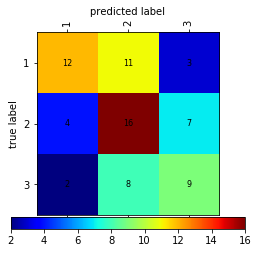

In [80]:
import sklearn.metrics as skmetrics

labels_names=['1', '2', '3']
C = skmetrics.confusion_matrix(y_true=y[test], y_pred=y_test_pred)
plot_confusion_matrix(C, labels_names)

print skmetrics.classification_report(y_true=y[test], y_pred=y_test_pred)

In [81]:
arr = np.array([1, 3, 2, 4, 5])
print train
arr[arr.argsort()[:3]]

[ 75  10 147 123   0 142 126  64  44  96  28  40 127  25  23 132  81  79
  84  39 101  86 120 173 162  47  94 135 166  61  73  33 125 133 139  62
 176 112 115 105  53   5 160   3 165  49  35  80  77  34  46   7 124  43
  70 136 110  91  83 156 161  89   8  13  59 152 131  17  72 155 134 148
 163  63  54 107  50 175  58  48  88  21  57 172 129  37 157 168   1  52
 149 130 151 103  99 116  87  74 121 177  20  71 106  14  92 102]


array([1, 2, 3])

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Now, normalize (scale) the columns of your data matrix and re-run the classification. What do you observe ?</p>

             precision    recall  f1-score   support

          1       0.77      0.77      0.77        26
          2       0.60      0.67      0.63        27
          3       0.75      0.63      0.69        19

avg / total       0.70      0.69      0.70        72



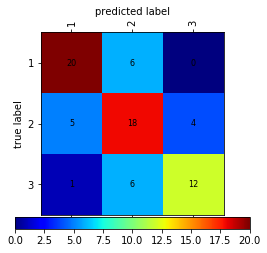

In [108]:
# Load dataset
dataset_xtrain = X[train]
dataset_ytrain = y[train]
dataset_xtest  = X[test]

# Normalized Data with Standardization method.
# We use Standardization method to normalize data with multiple dimensions.
dataset_xtrain_normalized = (dataset_xtrain - dataset_xtrain.mean(axis=0)) / dataset_xtrain.std(axis=0)

# Normalized Data with Standardization method.
# We use Standardization method to normalize data with multiple dimensions.
dataset_xtest_normalized = (dataset_xtest - dataset_xtest.mean(axis=0)) / dataset_xtest.std(axis=0)

# Classify the normalized dataset
prediction_normalized = nn_classify(dataset_xtrain_normalized, dataset_ytrain, dataset_xtest_normalized)

labels_names=['1', '2', '3']
C = skmetrics.confusion_matrix(y_true=y[test], y_pred=prediction_normalized)
plot_confusion_matrix(C, labels_names)

print skmetrics.classification_report(y_true=y[test], y_pred=prediction_normalized)

The classification is better when the data are normalized. 

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Above, we implemented a basic nearest neighbor classifier. Modify it so that it is a k nearest neighbor classifier. Evaluate it for k=3, 5, 10. Does increasing k help ? Is there a limit after which increasing k is useless ? Why ?</p>

In [198]:
def norm(x):
    return np.sqrt(x.dot(x))

def euclidean_distance(x1, x2):
    """Euclidean distance"""
    return norm(x1 - x2)

def distances(X_train, x):
    """
    Returns a vector containing the distance between x and each
    sample in X_train
    """
    n_train = X_train.shape[0]
    return np.array([euclidean_distance(X_train[i,:], x) for i in range(n_train)])

def nn_classify_single(X_train, y_train, X):
    """
    Nearest neighbor classifier. Returns the class of the nearest training vector
    """
    dists = distances(X_train, X)
    #closest = np.argsort(dists)
    #closest = np.argmin(dists)
    #print closest
    closest = np.argsort(dists)
    print closest
    return closest #y_train[closest]

def nn_classify(X_train, y_train, X):
    """
    Assign to each row in X the class of its nearest neighbor in X_train
    """
    y_pred = np.zeros(X.shape[0], dtype=np.int)
    for i in xrange(X.shape[0]):
        y_pred[i] = nn_classify_single(X_train, y_train, X[i])
    return y_pred

y_test_pred = nn_classify(X[train], y[train], X[test])

36
[ 36  77  13  54   8  86  97  11 100  10  81  46  19  87  23  69  55  16
  25  30  28  27  60  53  80  72  14  83  71  70  62  88  74  91  79  35
   4  50   9  22   2  61  37  33  49  34  85  84  24  56  20  96  67  15
  99  90  76  63  66   5  18  64  42  44  58 102  89  48  21  95 104  75
  92  59  68  12  98  17  31  29  57 105  45   0  65  82  73  93 101  38
  94  78  51   3  52  32   7   6  26  40  39  47  41  43   1 103]


ValueError: setting an array element with a sequence.

In [229]:
import collections

def predict(X_train, y_train, x_test, k):
    
    # create list for distances and targets
    old_distances = []

    for i in range(len(X_train)):
        # first we compute the euclidean distance
        # old_distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))
        # add it to list of distances
        # old_distances.append([old_distance, i])
        # old_distances.append([old_distance, i])

    # sort the list
    # old_distances = sorted(old_distances)
    
    dists = distances(X[train], x_test)
    closest = np.argsort(dists)
    
    # print old_distances
    # print closest 

    targets = []
    
    # make a list of the k neighbors' targets
    for i in range(k):
        index = closest[i]
        targets.append(y_train[index])

    # return most common target
    return collections.Counter(targets).most_common(1)[0][0]


def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    
    # loop over all observations
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

# Get datasets
X_train = np.array(X[train])
y_train = np.array(y[train])
X_test = np.array(X[test])

# Making our predictions 
predictions = []
kNearestNeighbor(X_train, y_train, X_test, predictions, 1)


[[9.8055545483159694, 36], [13.450561326576672, 77], [19.737682234750867, 13], [28.973474351551282, 54], [41.070897238799155, 8], [41.788669516987497, 86], [44.186561305446702, 97], [50.058204122800888, 11], [65.793660028911603, 100], [70.715997482889264, 10], [76.384095203124588, 81], [76.882191045781212, 46], [85.874514263546203, 19], [96.219114005482297, 87], [107.33813674552023, 23], [122.48378627393913, 69], [128.10673986953225, 55], [134.46058418733722, 16], [140.81705365473317, 25], [142.67159773409702, 30], [150.43332709210415, 28], [151.70776315007745, 27], [165.35947145537205, 60], [165.53301845855407, 53], [168.23871611492999, 80], [170.37000381522566, 72], [171.3260823692645, 14], [186.83784841407268, 83], [196.63431745247317, 71], [197.5109040027917, 70], [200.91429416544756, 62], [205.66931808123448, 88], [215.01909403585535, 74], [215.14413285051489, 91], [215.43099428819428, 79], [216.16436084609322, 35], [220.28274694128908, 4], [220.44993059649622, 50], [220.867345481

In [222]:
# Get datasets
X_train = np.array(X[train])
y_train = np.array(y[train])
X_test = np.array(X[test])

In [223]:
# Making our predictions 
predictions = []
kNearestNeighbor(X_train, y_train, X_test, predictions, 3)

# Accuracy 
labels_names=['1', '2', '3']
C = skmetrics.confusion_matrix(y_true=y[test], y_pred=predictions)
plot_confusion_matrix(C, labels_names)

print skmetrics.classification_report(y_true=y[test], y_pred=predictions)

TypeError: list indices must be integers, not tuple

             precision    recall  f1-score   support

          1       0.86      0.92      0.89        26
          2       0.68      0.63      0.65        27
          3       0.47      0.47      0.47        19

avg / total       0.69      0.69      0.69        72



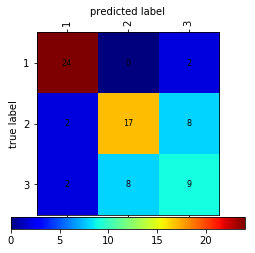

In [183]:
# Making our predictions 
predictions = []
kNearestNeighbor(X_train, y_train, X_test, predictions, 5)

# Accuracy 
labels_names=['1', '2', '3']
C = skmetrics.confusion_matrix(y_true=y[test], y_pred=predictions)
plot_confusion_matrix(C, labels_names)

print skmetrics.classification_report(y_true=y[test], y_pred=predictions)

             precision    recall  f1-score   support

          1       0.86      0.96      0.91        26
          2       0.68      0.56      0.61        27
          3       0.43      0.47      0.45        19

avg / total       0.68      0.68      0.68        72



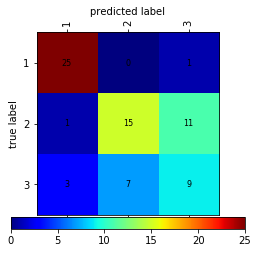

In [184]:
# Making our predictions 
predictions = []
kNearestNeighbor(X_train, y_train, X_test, predictions, 10)

# Accuracy 
labels_names=['1', '2', '3']
C = skmetrics.confusion_matrix(y_true=y[test], y_pred=predictions)
plot_confusion_matrix(C, labels_names)

print skmetrics.classification_report(y_true=y[test], y_pred=predictions)

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: In our example, we only used two features (magnesium and total phenols). Try classifying with all the features and compare the performance.</p>

In [185]:
from sklearn import cross_validation
X = df[['alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols', 'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue', 'OD280/OD315 of diluted wines', 'proline', 'class']].as_matrix()
y = df['class'].as_matrix()

# train and test are indices arrays containing the indices of train/test samples
train, test = cross_validation.train_test_split(
    np.arange(X.shape[0]), test_size=0.4, random_state=42 # we fix random state for reproducibility)
)

# Build dataset with all classes
X_train = np.array(X[train])
y_train = np.array(y[train])
X_test = np.array(X[test])

             precision    recall  f1-score   support

          1       0.79      0.85      0.81        26
          2       0.65      0.63      0.64        27
          3       0.50      0.47      0.49        19

avg / total       0.66      0.67      0.66        72



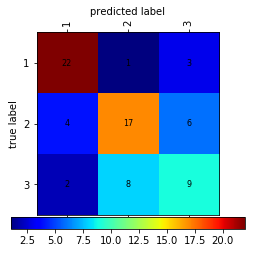

In [186]:
# Making our predictions 
prediction = []
kNearestNeighbor(X_train, y_train, X_test, prediction, 3)

# Accuracy 
labels_names=['1', '2', '3']
C = skmetrics.confusion_matrix(y_true=y[test], y_pred=prediction)
plot_confusion_matrix(C, labels_names)

print skmetrics.classification_report(y_true=y[test], y_pred=prediction)

             precision    recall  f1-score   support

          1       0.86      0.92      0.89        26
          2       0.68      0.63      0.65        27
          3       0.47      0.47      0.47        19

avg / total       0.69      0.69      0.69        72



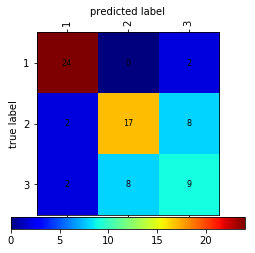

In [187]:
# Making our predictions 
prediction = []
kNearestNeighbor(X_train, y_train, X_test, prediction, 5)

# Accuracy 
labels_names=['1', '2', '3']
C = skmetrics.confusion_matrix(y_true=y[test], y_pred=prediction)
plot_confusion_matrix(C, labels_names)

print skmetrics.classification_report(y_true=y[test], y_pred=prediction)

             precision    recall  f1-score   support

          1       0.86      0.96      0.91        26
          2       0.68      0.56      0.61        27
          3       0.43      0.47      0.45        19

avg / total       0.68      0.68      0.68        72



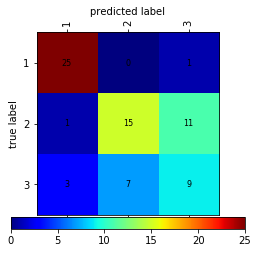

In [188]:
# Making our predictions 
prediction = []
kNearestNeighbor(X_train, y_train, X_test, prediction, 10)

# Accuracy 
labels_names=['1', '2', '3']
C = skmetrics.confusion_matrix(y_true=y[test], y_pred=prediction)
plot_confusion_matrix(C, labels_names)

print skmetrics.classification_report(y_true=y[test], y_pred=prediction)